In [ ]:
intell# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install fasttext
!pip install git+https://github.com/facebookresearch/fastText.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199769 sha256=5df4a18c7face1b8e4228d149f537f37216293acb96f68334d7120a014af7613
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext
  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-o442pcgv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fastText.git /tmp/pip-req-build-o442pcgv
  Resolved https://github.com/facebookresearch/fastText.git to commit 1142dc4c4ecbc19cc16eee5cdd28472e689267e6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from tensorflow.keras import regularizers


In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
!ls

sample_data  Sarcasm_Headlines_Dataset.json  Sarcasm_Headlines_Dataset_v2.json


In [ ]:
from gensim.models.fasttext import FastText

In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn import set_config
set_config(print_changed_only = False)
from tqdm import tqdm
from spacy.lang.en.stop_words import STOP_WORDS



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,auc


In [ ]:
from xgboost import XGBClassifier

In [ ]:
!pip install lightgbm --install-option=--gpu



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [ ]:
import re
import spacy
from collections import Counter

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from tensorflow.keras.utils import to_categorical,pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU,Concatenate,Bidirectional,Lambda,Conv1D,MaxPooling1D,Flatten,Embedding,MultiHeadAttention,GlobalAveragePooling1D,LayerNormalization,Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Embedding

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
json_data = []

with open("/content/Sarcasm_Headlines_Dataset_v2.json", 'r') as file:
    for line in file:
        try:
            json_object = json.loads(line)
            json_data.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

In [ ]:
len(json_data)

28619

In [ ]:
json_data[:10]

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [ ]:
texts=[]
labels=[]
urls=[]

for items in json_data:
    texts.append(items["headline"])
    labels.append(items["is_sarcastic"])
    urls.append(items["article_link"])

In [ ]:
count_labels=Counter(labels)

In [ ]:
typeCom=["normal","sarcastic"]
for item,count in count_labels.items():
    print(f"Count of Label {item} which denotes {typeCom[item]} is {count} and percentage is {count*100/len(labels)}")

Count of Label 1 which denotes sarcastic is 13634 and percentage is 47.639679932911704
Count of Label 0 which denotes normal is 14985 and percentage is 52.360320067088296


In [ ]:
news=pd.DataFrame()

news["text"]=texts
news["label"]=labels

news.head(n=10).style.background_gradient(cmap="Oranges")

,text,label
0,thirtysomething scientists unveil doomsday clock of hair loss,1
1,"dem rep. totally nails why congress is falling short on gender, racial equality",0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting to work,1
4,mother comes pretty close to using word 'streaming' correctly,1
5,my white inheritance,0
6,5 ways to file your taxes with less stress,0
7,richard branson's global-warming donation nearly as much as cost of failed balloon trips,1
8,shadow government getting too large to meet in marriott conference room b,1
9,lots of parents know this scenario,0


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    28619 non-null  object
 1   label   28619 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [ ]:
news.duplicated().sum()

116

In [ ]:
news.drop_duplicates(inplace=True)

In [ ]:
news["label"].value_counts()

0    14951
1    13552
Name: label, dtype: int64

In [ ]:
def ProcessText(x):
    cleaned_text = re.sub(r'\s+\n+', ' ', x)
    cleaned_text = re.sub(r'[^a-zA-Z0-9]', ' ', cleaned_text)
    doc = nlp(cleaned_text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS])
    lemmatized_text = re.sub(r'\b\w\b', '', lemmatized_text)
    lemmatized_text = lemmatized_text.lower()
    return lemmatized_text

In [ ]:
# news["text"]=news["text"].apply(ProcessText)

In [ ]:
news1=pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json",lines=True)
news2=pd.read_json(r"/content/Sarcasm_Headlines_Dataset.json",lines=True)

news_combined = pd.concat([news1,news2])
news_combined.reset_index(drop=True, inplace=True)

In [ ]:
news_combined.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [ ]:
len(news_combined)

55328

In [ ]:
news_combined.drop_duplicates(inplace=True)

In [ ]:
news_combined.dropna(inplace=True)

In [ ]:
news_combined["headline"]=news_combined["headline"].apply(ProcessText)

In [ ]:
X=news_combined["headline"]
y=news_combined["is_sarcastic"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=100000,ngram_range=(1,3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
log_model=LogisticRegression(max_iter=100000,random_state=42,n_jobs=4)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
log_pred=log_model.predict(X_test_tfidf)

In [ ]:
accuracy_log=accuracy_score(log_pred,y_test)
precision_log=precision_score(log_pred,y_test)
recall_log=recall_score(log_pred,y_test)
f1_score = 2 * (precision_log * recall_log) / (precision_log + recall_log)
print(f"Accuracy score of Logistic Regression model:{accuracy_log}")
print(f"Precision score of Logistic Regression model:{precision_log}")
print(f"Recall score of Logistic Regression model:{recall_log}")
print(f"F1 score of Logistic Regression model:{f1_score}")

Accuracy score of Logistic Regression model:0.786512928022362
Precision score of Logistic Regression model:0.7508281192491719
Recall score of Logistic Regression model:0.7891682785299806
F1 score of Logistic Regression model:0.7695209354960392


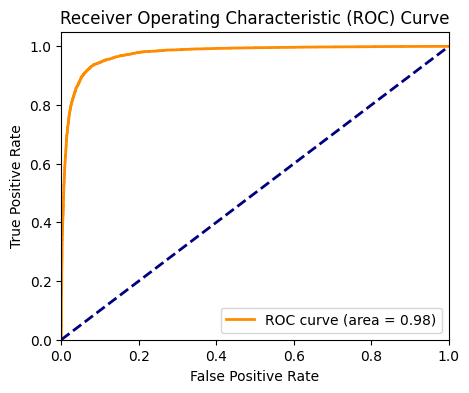

In [ ]:
y_pred_proba = log_model.predict_proba(X_train_tfidf)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import seaborn as sns

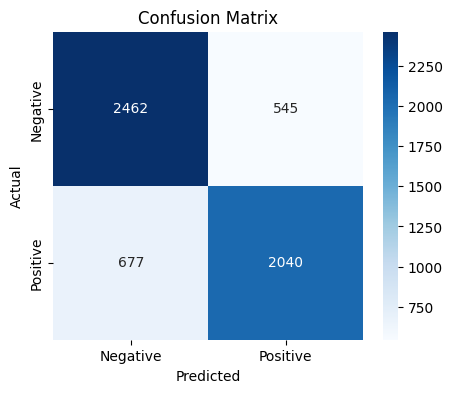

In [ ]:
conf_matrix = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
xgb_params={
    'n_estimators':10,
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'gpu_id': 0,
    'n_jobs': -1
}

xgb_model=XGBClassifier(n_estimators=20,learning_rate=0.0005,max_depth=10,max_leaves=4)
xgb_model.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
# xgb_model=XGBClassifier(learning_rate=0.0005,max_depth=10,max_leaves=4,n_etimators=30)
# xgb_model.fit(X_train_tfidf,y_train)

In [ ]:
# xgb_pred=xgb_model.predict(X_test_tfidf)

In [ ]:
# accuracy_xgb=accuracy_score(xgb_pred,y_test)
# precision_xgb=precision_score(xgb_pred,y_test)
# recall_xgb=recall_score(xgb_pred,y_test)
# print(f"Accuracy score of Xgboost model:{accuracy_xgb}")
# print(f"Precision score of Xgboost model:{precision_xgb}")
# print(f"Recall score of Xgboost model:{recall_xgb}")

In [ ]:
sentences=news_combined["headline"]
labels=news_combined["is_sarcastic"]


train_text,val_text,train_labels,val_labels=train_test_split(sentences,labels,test_size=0.2,random_state=42,stratify=labels)
val_text,test_text,val_labels,test_labels=train_test_split(val_text,val_labels,test_size=0.5,random_state=42,stratify=val_labels)

In [ ]:
def LossesAndScores(history):
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  print("_________LATEST MEASURES__________")
  print("Last Training Accuracy:", train_accuracy[-1])
  print("Last Validation Accuracy:", val_accuracy[-1])
  print("Last Training Loss:", train_loss[-1])
  print("Last Validation Loss:", val_loss[-1])

  print("_________BEST MEASURES___________")
  print("Maximum Training Accuracy:", max(train_accuracy))
  print("Maximum Validation Accuracy:", max(val_accuracy))
  print("Minimum Training Loss:", min(train_loss))
  print("Minimum Validation Loss:", min(val_loss))


In [ ]:
def PlotMeasures(history):
  plt.figure(figsize=(5,4))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.figure(figsize=(5,4))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
max_len = 20
oov_token = '00_V'
padding_type = 'pre'
trunc_type = 'pre'

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  18678


In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_text)
train_text = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_text)
val_text = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_text)
test_text = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [ ]:
class EncoderTransformer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, heads, neurons, dropout_rate=0.25, l2_reg=1e-4):
        super(EncoderTransformer, self).__init__()
        self.attention = MultiHeadAttention(num_heads=heads, key_dim=embedding_dim)
        self.nn1 = Sequential([
            Dense(neurons*2, activation='relu'),
            Dense(embedding_dim, activation='relu')
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)

        self.conv1d = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')
        self.pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(64, activation='relu')
        self.dropout2 = Dropout(dropout_rate)
        self.dense2 = Dense(embedding_dim, activation='relu')
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

    def call(self, inputs, training):
        attn_output = self.attention(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.nn1(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        conv_output = self.conv1d(out2)
        return conv_output

class AttentionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(AttentionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

embedding_dim = 40
heads = 2
neurons = 16
maxlen = 20

inputs = Input(shape=(maxlen,))
embedding_layer = AttentionEmbedding(maxlen, vocab_size, embedding_dim)
x = embedding_layer(inputs)
x = EncoderTransformer(embedding_dim, heads, neurons, dropout_rate=0.5)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model_t = tf.keras.models.Model(inputs, output)

# Compile the model with an appropriate optimizer and loss function
model_t.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 5, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00000001)

In [ ]:
chk_t = ModelCheckpoint('model-attention.tf',
                            monitor="val_loss",
                            mode="min",

                            save_best_only = True,
                            verbose=1)

In [ ]:
model_t.compile(loss='binary_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [ ]:
model_t.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 attention_embedding (Atten  (None, 20, 40)            747920    
 tionEmbedding)                                                  
                                                                 
 encoder_transformer (Encod  (None, 20, 64)            23616     
 erTransformer)                                                  
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                             

In [ ]:
history_t = model_t.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=16,
                    callbacks=[earlystopping,learning_rate_reduction,chk_t])

Epoch 1/25
1431/1431 [==============================] - ETA: 0s - loss: 0.5459 - accuracy: 0.7126
Epoch 1: val_loss improved from inf to 0.44368, saving model to model-attention.tf


1431/1431 [==============================] - 32s 16ms/step - loss: 0.5459 - accuracy: 0.7126 - val_loss: 0.4437 - val_accuracy: 0.7928 - lr: 5.0000e-04
Epoch 2/25
1429/1431 [============================>.] - ETA: 0s - loss: 0.3404 - accuracy: 0.8560
Epoch 2: val_loss did not improve from 0.44368
1431/1431 [==============================] - 12s 9ms/step - loss: 0.3402 - accuracy: 0.8561 - val_loss: 0.4626 - val_accuracy: 0.7862 - lr: 5.0000e-04
Epoch 3/25
1426/1431 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9038
Epoch 3: val_loss did not improve from 0.44368
1431/1431 [==============================] - 12s 9ms/step - loss: 0.2397 - accuracy: 0.9037 - val_loss: 0.4759 - val_accuracy: 0.7959 - lr: 5.0000e-04
Epoch 4/25
1426/1431 [============================>.] - ETA: 0s - loss: 0.1684 - accuracy: 0.9339
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 4: val_loss did not improve from 0.44368
1431/1431 [======================

In [ ]:
LossesAndScores(history_t)

_________LATEST MEASURES__________
Last Training Accuracy: 0.9711702466011047
Last Validation Accuracy: 0.7928022146224976
Last Training Loss: 0.07077926397323608
Last Validation Loss: 1.0308279991149902
_________BEST MEASURES___________
Maximum Training Accuracy: 0.9711702466011047
Maximum Validation Accuracy: 0.7973445057868958
Minimum Training Loss: 0.07077926397323608
Minimum Validation Loss: 0.4436788856983185


In [ ]:
def build_siamese_network(max_len, vocab_size, embedding_dim, dense_units=(256, 128), dropout_rate=0.25):
    input_layer = Input(shape=(max_len,), dtype='int32')
    # input_layer = Input(shape=(max_len,), dtype='int32')

    embedding_layer = Embedding(input_dim=vocab_size,
                                output_dim=embedding_dim,
                                input_length=max_len)(input_layer)

    flattened_embedding = Flatten()(embedding_layer)
    flattened_embedding = Dropout(dropout_rate)(flattened_embedding)

    left_branch = Dense(dense_units[0], activation='relu')(flattened_embedding)
    right_branch = Dense(dense_units[0]//2, activation='relu')(flattened_embedding)

    left_branch = Dropout(dropout_rate)(left_branch)
    left_branch = Dense(dense_units[1]//2, activation='relu')(left_branch)
    right_branch = Dropout(dropout_rate)(right_branch)
    right_branch = Dense(dense_units[1]//4, activation='relu')(right_branch)

    merged_layer = Concatenate()([left_branch, right_branch])

    similarity_layer = Dense(1, activation='sigmoid')(merged_layer)

    siamese_model = tf.keras.models.Model(inputs=input_layer, outputs=similarity_layer)

    return siamese_model

In [ ]:
embedding_dim = 40
maxlen=20
siamese_model=build_siamese_network(maxlen,vocab_size,embedding_dim)


In [ ]:
siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [ ]:
chk_s = ModelCheckpoint('model-siamese.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
history_s=siamese_model.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=16,
                    callbacks=[earlystopping,learning_rate_reduction,chk_s])

Epoch 1/25
1431/1431 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.7253
Epoch 1: val_loss improved from inf to 0.43603, saving model to model-siamese.tf
1431/1431 [==============================] - 15s 9ms/step - loss: 0.5248 - accuracy: 0.7253 - val_loss: 0.4360 - val_accuracy: 0.7956 - lr: 5.0000e-04
Epoch 2/25
1424/1431 [============================>.] - ETA: 0s - loss: 0.2799 - accuracy: 0.8855
Epoch 2: val_loss did not improve from 0.43603
1431/1431 [==============================] - 7s 5ms/step - loss: 0.2798 - accuracy: 0.8855 - val_loss: 0.4545 - val_accuracy: 0.7897 - lr: 5.0000e-04
Epoch 3/25
1425/1431 [============================>.] - ETA: 0s - loss: 0.1254 - accuracy: 0.9531
Epoch 3: val_loss did not improve from 0.43603
1431/1431 [==============================] - 7s 5ms/step - loss: 0.1254 - accuracy: 0.9532 - val_loss: 0.5998 - val_accuracy: 0.7799 - lr: 5.0000e-04
Epoch 4/25
1423/1431 [============================>.] - ETA: 0s - loss: 0.0589 -

In [ ]:
LossesAndScores(history_s)

_________LATEST MEASURES__________
Last Training Accuracy: 0.9956755042076111
Last Validation Accuracy: 0.7809224128723145
Last Training Loss: 0.014798136427998543
Last Validation Loss: 1.0135526657104492
_________BEST MEASURES___________
Maximum Training Accuracy: 0.9956755042076111
Maximum Validation Accuracy: 0.795597493648529
Minimum Training Loss: 0.014798136427998543
Minimum Validation Loss: 0.4360310733318329


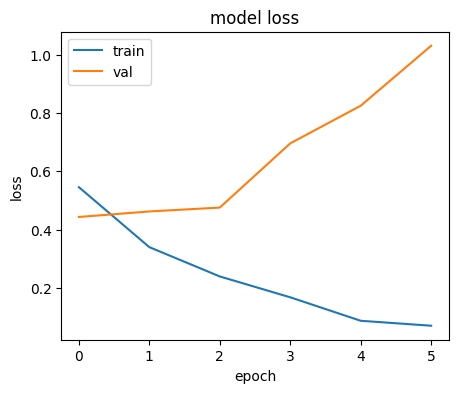

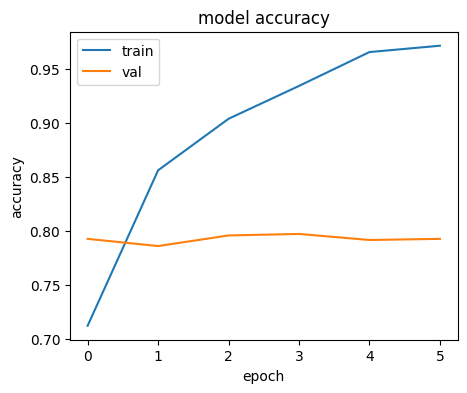

In [ ]:
PlotMeasures(history_t)

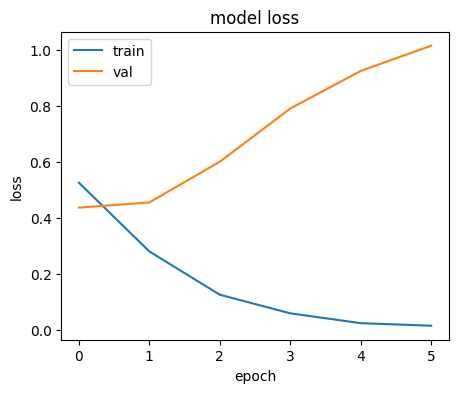

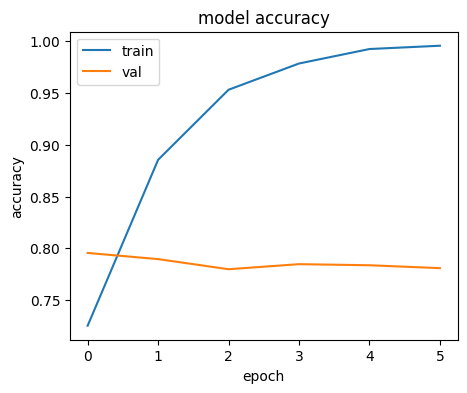

In [ ]:
PlotMeasures(history_s)

In [ ]:
bi_gru_model=Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.35),
    BatchNormalization(),
    Bidirectional(GRU(32)),
    Dropout(0.35),
    BatchNormalization(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
bi_gru_model.compile(loss='binary_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [ ]:
chk_gru = ModelCheckpoint('model-gru.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
history_g=bi_gru_model.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=16,
                    callbacks=[earlystopping,learning_rate_reduction,chk_gru])

Epoch 1/25
1431/1431 [==============================] - ETA: 0s - loss: 0.5770 - accuracy: 0.7011
Epoch 1: val_loss improved from inf to 0.45492, saving model to model-gru.tf
1431/1431 [==============================] - 48s 28ms/step - loss: 0.5770 - accuracy: 0.7011 - val_loss: 0.4549 - val_accuracy: 0.7830 - lr: 5.0000e-04
Epoch 2/25
1429/1431 [============================>.] - ETA: 0s - loss: 0.3677 - accuracy: 0.8418
Epoch 2: val_loss improved from 0.45492 to 0.44850, saving model to model-gru.tf
1431/1431 [==============================] - 34s 24ms/step - loss: 0.3676 - accuracy: 0.8419 - val_loss: 0.4485 - val_accuracy: 0.7959 - lr: 5.0000e-04
Epoch 3/25
1427/1431 [============================>.] - ETA: 0s - loss: 0.2562 - accuracy: 0.8977
Epoch 3: val_loss did not improve from 0.44850
1431/1431 [==============================] - 17s 12ms/step - loss: 0.2563 - accuracy: 0.8977 - val_loss: 0.7491 - val_accuracy: 0.7334 - lr: 5.0000e-04
Epoch 4/25
1431/1431 [=======================

In [ ]:
LossesAndScores(history_g)

_________LATEST MEASURES__________
Last Training Accuracy: 0.9826147556304932
Last Validation Accuracy: 0.776380181312561
Last Training Loss: 0.0564144067466259
Last Validation Loss: 1.0181281566619873
_________BEST MEASURES___________
Maximum Training Accuracy: 0.9826147556304932
Maximum Validation Accuracy: 0.7959468960762024
Minimum Training Loss: 0.0564144067466259
Minimum Validation Loss: 0.4484955072402954


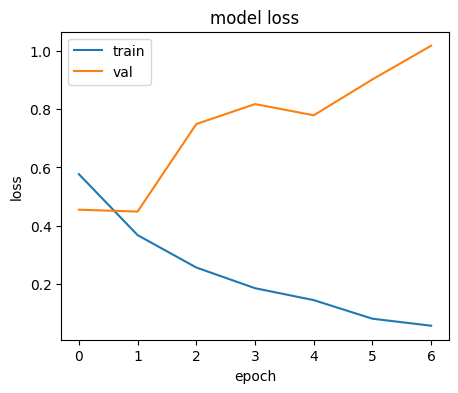

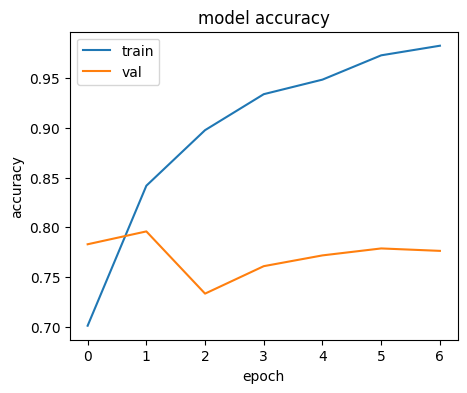

In [ ]:
PlotMeasures(history_g)

In [ ]:
# bi_lstm_model=Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=maxlen),
#     Bidirectional(LSTM(64, return_sequences=True,kernel_regularizer=regularizers.l2(1e-4))),
#     Dropout(0.35),
#     BatchNormalization(),
#     Bidirectional(LSTM(32,kernel_regularizer=regularizers.l2(1e-4))),
#     Dropout(0.35),
#     BatchNormalization(),
#     Flatten(),
#     Dense(16, activation='relu'),
#     Dense(1,activation='sigmoid')
# ])

In [ ]:
bi_lstm_model=Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.35),
    BatchNormalization(),
    Bidirectional(LSTM(32)),
    Dropout(0.35),
    BatchNormalization(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
bi_lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

In [ ]:
chk_lstm = ModelCheckpoint('model-lstm.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
history_l=bi_lstm_model.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=16,
                    callbacks=[earlystopping,learning_rate_reduction,chk_lstm])

Epoch 1/25
1427/1431 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5929
Epoch 1: val_loss improved from inf to 0.53880, saving model to model-lstm.tf
1431/1431 [==============================] - 50s 30ms/step - loss: 0.6900 - accuracy: 0.5934 - val_loss: 0.5388 - val_accuracy: 0.7187 - lr: 1.0000e-04
Epoch 2/25
1431/1431 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.7677
Epoch 2: val_loss improved from 0.53880 to 0.48140, saving model to model-lstm.tf
1431/1431 [==============================] - 37s 26ms/step - loss: 0.4870 - accuracy: 0.7677 - val_loss: 0.4814 - val_accuracy: 0.7701 - lr: 1.0000e-04
Epoch 3/25
1427/1431 [============================>.] - ETA: 0s - loss: 0.3708 - accuracy: 0.8373
Epoch 3: val_loss did not improve from 0.48140
1431/1431 [==============================] - 17s 12ms/step - loss: 0.3707 - accuracy: 0.8372 - val_loss: 0.5325 - val_accuracy: 0.7624 - lr: 1.0000e-04
Epoch 4/25
1431/1431 [=====================

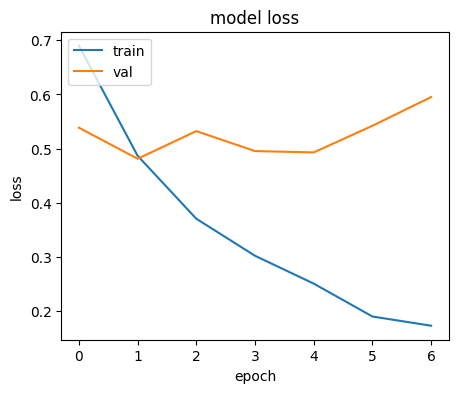

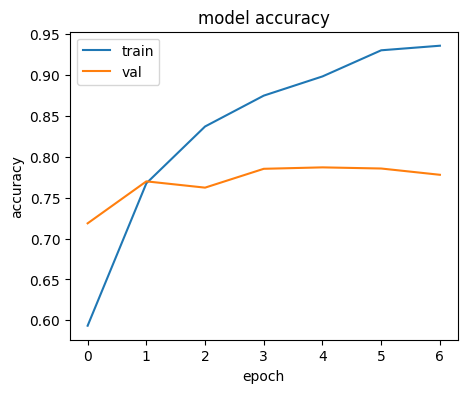

In [ ]:
PlotMeasures(history_l)

In [ ]:
LossesAndScores(history_l)

_________LATEST MEASURES__________
Last Training Accuracy: 0.9360939860343933
Last Validation Accuracy: 0.7781271934509277
Last Training Loss: 0.17326833307743073
Last Validation Loss: 0.5953680872917175
_________BEST MEASURES___________
Maximum Training Accuracy: 0.9360939860343933
Maximum Validation Accuracy: 0.7872117161750793
Minimum Training Loss: 0.17326833307743073
Minimum Validation Loss: 0.48139724135398865


In [ ]:
import seaborn as sns

In [ ]:
# def OtherMeasures(model):
#   val_predictions = model.predict(val_text_padded)
#   val_pred_classes = (val_predictions > 0.5).astype(int)
#   val_true_classes = val_labels_encoded

#   # Calculate precision and recall
#   precision = precision_score(val_true_classes, val_pred_classes)
#   recall = recall_score(val_true_classes, val_pred_classes)

#   print(f'Precision: {precision}')
#   print(f'Recall: {recall}')




In [ ]:
def evaluate_model(model, text_data, labels):
    predictions = model.predict(text_data)
    predictions_binary = (predictions > 0.5).astype(int)

    precision = precision_score(labels, predictions_binary)
    recall = recall_score(labels, predictions_binary)
    f1_score = 2 * (precision * recall) / (precision + recall)


    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:",f1_score)

    conf_matrix = confusion_matrix(labels, predictions_binary)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    auc_score = roc_auc_score(labels, predictions)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()



90/90 [==============================] - 1s 3ms/step
Precision: 0.7843601895734598
Recall: 0.7280058651026393
F1-score: 0.7551330798479088


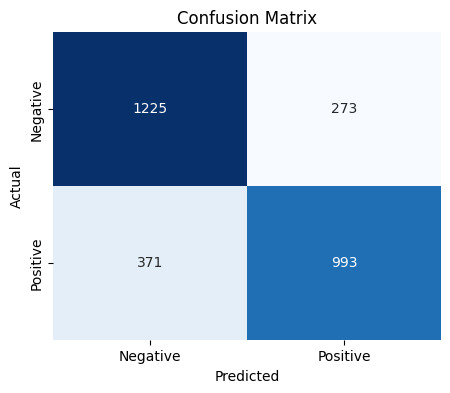

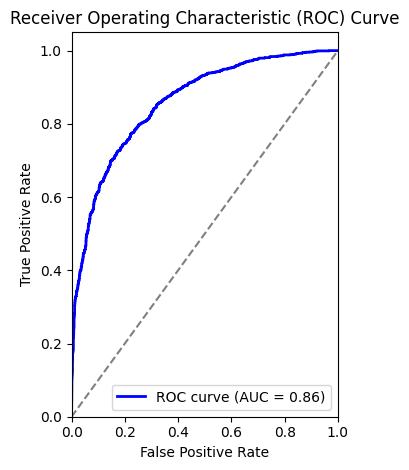

In [ ]:
evaluate_model(model_t,test_text,test_labels)

90/90 [==============================] - 0s 2ms/step
Precision: 0.7643362136684996
Recall: 0.7133431085043989
F1-score: 0.7379598028062192


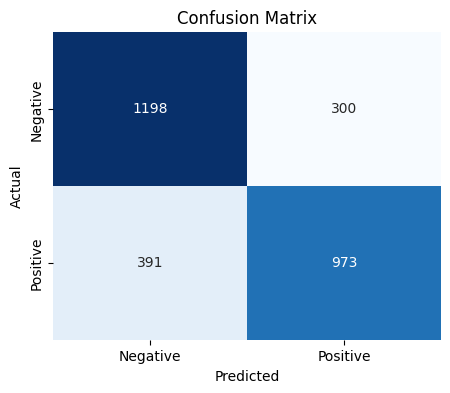

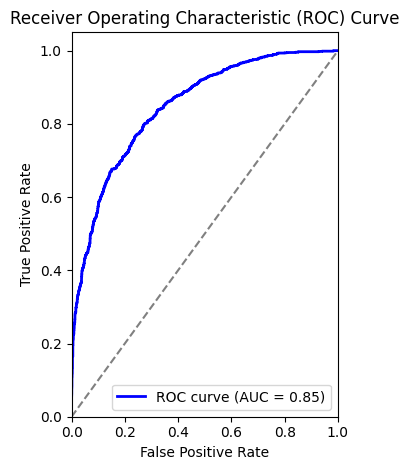

In [ ]:
evaluate_model(siamese_model,test_text,test_labels)

90/90 [==============================] - 2s 4ms/step
Precision: 0.7843925985518906
Recall: 0.7148093841642229
F1-score: 0.7479861910241656


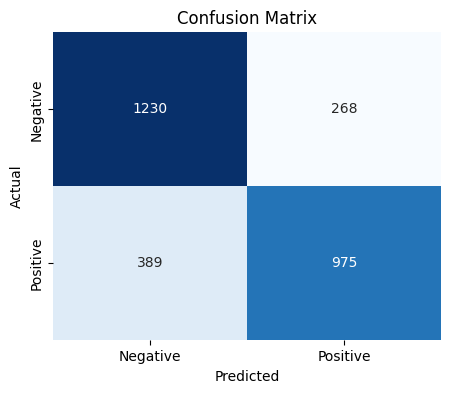

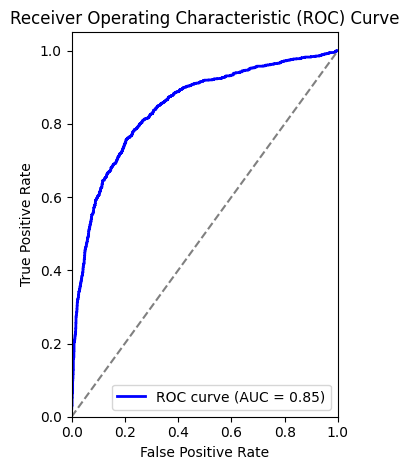

In [ ]:
evaluate_model(bi_gru_model,test_text,test_labels)

90/90 [==============================] - 2s 4ms/step
Precision: 0.7430093209054593
Recall: 0.8181818181818182
F1-score: 0.7787857641311933


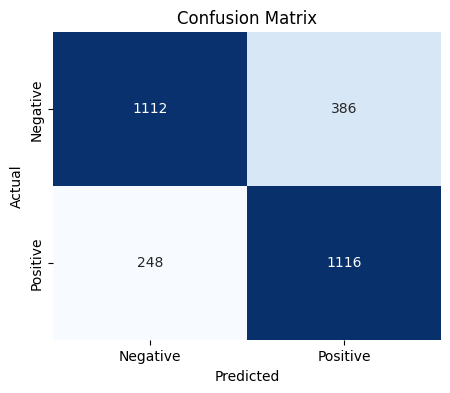

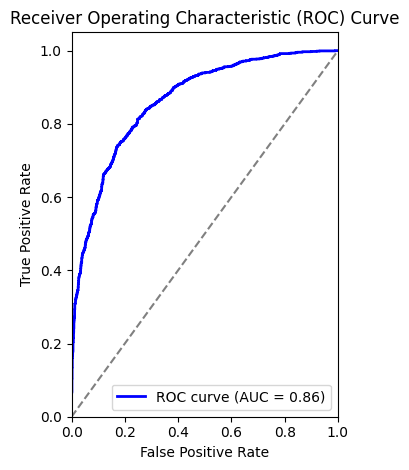

In [ ]:
evaluate_model(bi_lstm_model,test_text,test_labels)